In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
file_path = 'E2-set1.csv'
df = pd.read_csv(file_path)

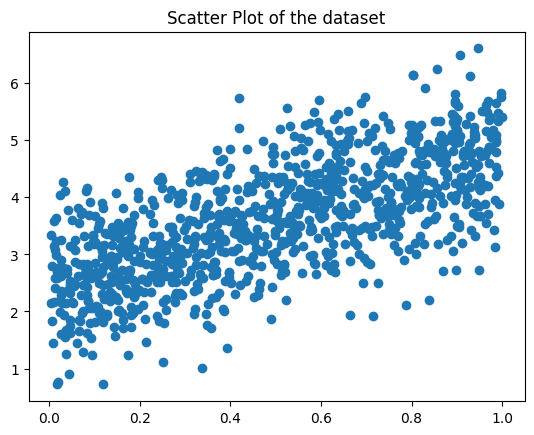

In [3]:
# Create a scatter plot of the dataset
plt.scatter(df['x'], df['y'])
plt.title("Scatter Plot of the dataset")
plt.show()

/var/folders/l9/6h3jgt952zj83sn29s4vbqvr0000gn/T/ipykernel_11128/3259802713.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Coeff_0': [model.params[0]],
/var/folders/l9/6h3jgt952zj83sn29s4vbqvr0000gn/T/ipykernel_11128/3259802713.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'pvalue_0': [model.pvalues[0]],
/var/folders/l9/6h3jgt952zj83sn29s4vbqvr0000gn/T/ipykernel_11128/3259802713.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

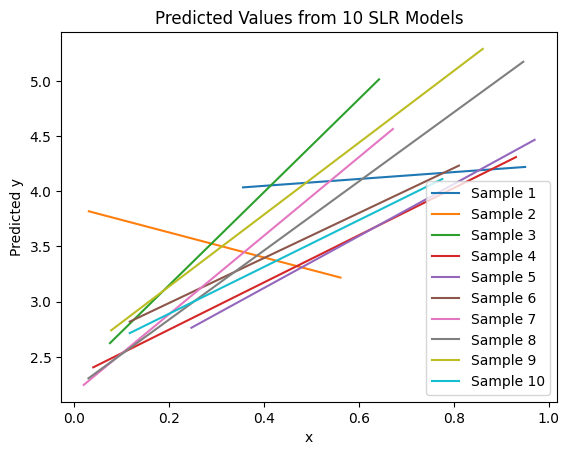

In [4]:
# Set the seed for reproducibility. What is this? Why is it necessary?
np.random.seed(42)

# Create a DataFrame to store the results
columns = ['Sample', 'MSE', 'R2', 'Coeff_0', 'pvalue_0', 'Coeff_0_CI_Low','Coeff_0_CI_High', 'Coeff_1', 'pvalue_1', 'Coeff_1_CI_Low','Coeff_1_CI_High','F-Statistic','F-pvalue']
results_df = pd.DataFrame(columns=columns)

# Create a subplot for the plot
fig, ax = plt.subplots()

# Create random samples of the specified sample size and fit SLR models and calculate the metrics
sample_size = 5

# Create a list for storing all the models
LRModels = []

for i in range(10):
    # Create a random sample
    random_sample = df.sample(n=sample_size, replace=False)

    # Extract dependent variable (y) and independent variable (x)
    y = random_sample['y']
    x = random_sample['x']
    
    # Add a constant term to the independent variable (for intercept)
    # Why is this necessary?
    x = sm.add_constant(x)

    # Fit Simple Linear Regression model
    model = sm.OLS(y, x).fit()
    LRModels.append(model)

    # Calculate metrics
    mse = np.mean(model.resid**2)
    r2 = model.rsquared
    
    CI_interval = model.conf_int(alpha=0.05)

    # Append results to the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({
        'Sample': [i + 1],
        'MSE': [mse],
        'R2': [r2],
        'Coeff_0': [model.params[0]],
        'pvalue_0': [model.pvalues[0]],
        'Coeff_1': [model.params[1]],
        'pvalue_1': [model.pvalues[1]],
        'Coeff_0_CI_Low': [CI_interval[0][0]],
        'Coeff_0_CI_High': [CI_interval[0][1]],
        'Coeff_1_CI_Low': [CI_interval[1][0]],
        'Coeff_1_CI_High': [CI_interval[1][1]],
        'F-Statistic': [model.fvalue],
        'F-pvalue': [model.f_pvalue]
    })], axis=0)

    # Plot the predicted values
    x_pred = np.linspace(x.min(), x.max(), 100)
    x_pred = sm.add_constant(x_pred)
    y_pred = model.predict(x_pred)
    ax.plot(x_pred[:, 1], y_pred, label=f'Sample {i + 1}')

# Set labels and title for the plot
#ax.scatter(df['x'], df['y'],marker=".")
ax.set_xlabel('x')
ax.set_ylabel('Predicted y')
ax.set_title('Predicted Values from 10 SLR Models')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [6]:
# Print the results table
results_df[['Sample', 'MSE', 'R2', 'Coeff_0', 'pvalue_0', 'Coeff_1', 'pvalue_1','F-Statistic','F-pvalue']]
#results_df.to_csv(f"E2-set2-out-sample_size-{sample_size}.csv",index=False)

,Sample,MSE,R2,Coeff_0,pvalue_0,Coeff_1,pvalue_1,F-Statistic,F-pvalue
0,1,0.183542,0.030343,3.924157,0.009202,0.311697,0.779337,0.093879,0.779337
0,2,0.160716,0.266171,3.854085,0.002079,-1.133454,0.373545,1.088147,0.373545
0,3,0.101182,0.915231,2.304214,0.005054,4.217887,0.010754,32.390275,0.010754
0,4,0.042373,0.906433,2.317937,0.001217,2.139670,0.012506,29.062625,0.012506
0,5,0.160835,0.677476,2.180850,0.040342,2.355896,0.086914,6.301619,0.086914
0,6,0.090129,0.730747,2.579030,0.003312,2.039912,0.064927,8.141946,0.064927
0,7,0.426481,0.661546,2.172360,0.031512,3.561131,0.094039,5.863839,0.094039
0,8,0.917504,0.608229,2.209715,0.091301,3.132325,0.119786,4.657526,0.119786
0,9,0.278863,0.765126,2.484621,0.011857,3.258520,0.052222,9.772791,0.052222
0,10,0.268532,0.525971,2.465569,0.025896,2.121615,0.165579,3.328726,0.165579
